## Train and Analysis of Open Ended model

In [5]:
import os
# Make sure you use the autograd version of numpy (which we named 'ag_np')
# to do all the loss calculations, since automatic gradients are needed
import autograd.numpy as ag_np

# Use helper packages
from AbstractBaseCollabFilterSGD import AbstractBaseCollabFilterSGD
from train_valid_test_loader import load_train_valid_test_datasets

# Some packages you might need (uncomment as necessary)
import pandas as pd
import matplotlib.pyplot as plt

from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem

In [6]:
# Load the dataset
train_tuple, valid_tuple, test_tuple, n_users, n_items = \
    load_train_valid_test_datasets()

test_y = test_tuple[2]


In [9]:
leaderboard_test_df = pd.read_csv(os.path.join('data_movie_lens_100k', "ratings_masked_leaderboard_set.csv"))
leaderboard_test_tuple = (leaderboard_test_df['user_id'].values,
                          leaderboard_test_df['item_id'].values)

In [21]:
output_dir = 'leaderboard_predictions'
if not os.path.isdir(output_dir):
    os.mkdir(output_dir)
    
def save_predictions(model, output_filetitle, mu, b_per_user, c_per_item, U, V):
    output_filename = output_filetitle + '_predicted_ratings_leaderboard.txt'
    output_path = os.path.join(output_dir, output_filename)
    yhat = model.predict(leaderboard_test_tuple[0], leaderboard_test_tuple[1], mu=mu, b_per_user=b_per_user, c_per_item=c_per_item, U=U, V=V)
    ag_np.savetxt(output_path, yhat)
    

## Analysis - with no regularization (α=0); K = 2

In [14]:
# Create the model and initialize its parameters
# to have right scale as the dataset (right num users and items)
noreg_k2_model = CollabFilterOneVectorPerItem(
    n_epochs=500, batch_size=1000, step_size=0.1,
    n_factors=2, alpha=0.0)
noreg_k2_model.init_parameter_dict(n_users, n_items, train_tuple)

# Fit the model with SGD
noreg_k2_model.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total     1.56002 | train_MAE     1.00255 | valid_MAE     1.00803 | grad_wrt_mu     0.95203 | grad_wrt_b_per_user     0.00167 | grad_wrt_c_per_item     0.00104 | grad_wrt_U     0.00057 | grad_wrt_V     0.00031
epoch       0.014 | loss_total     1.42677 | train_MAE     0.99187 | valid_MAE     0.99647 | grad_wrt_mu     0.90689 | grad_wrt_b_per_user     0.00164 | grad_wrt_c_per_item     0.00092 | grad_wrt_U     0.00058 | grad_wrt_V     0.00032
epoch       0.029 | loss_total     1.45318 | train_MAE     0.98171 | valid_MAE     0.98549 | grad_wrt_mu     0.86846 | grad_wrt_b_per_user     0.00162 | grad_wrt_c_per_item     0.00101 | grad_wrt_U     0.00052 | grad_wrt_V     0.00031
epoch       0.043 | loss_total     1.35081 | train_MAE     0.97196 | valid_MAE     0.97495 | grad_wrt_mu     0.50863 | grad_wrt_b_per_user     0.00148 | grad_wrt_c_per_item     0.00093 | grad_wrt_U     0.00031 | grad_wrt_V     0.00018
epoch       0.129 | loss_total     1.25943 | train_MAE     0

epoch      12.000 | loss_total     1.08873 | train_MAE     0.86261 | valid_MAE     0.86988 | grad_wrt_mu     0.10619 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00007 | grad_wrt_V     0.00004
epoch      13.000 | loss_total     1.07963 | train_MAE     0.85628 | valid_MAE     0.86376 | grad_wrt_mu     0.00616 | grad_wrt_b_per_user     0.00128 | grad_wrt_c_per_item     0.00077 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      14.000 | loss_total     1.07065 | train_MAE     0.85190 | valid_MAE     0.85973 | grad_wrt_mu     0.13253 | grad_wrt_b_per_user     0.00124 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00008 | grad_wrt_V     0.00005
epoch      15.000 | loss_total     1.06321 | train_MAE     0.84857 | valid_MAE     0.85680 | grad_wrt_mu     0.03412 | grad_wrt_b_per_user     0.00124 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch      16.000 | loss_total     1.05492 | train_MAE     0

epoch      62.000 | loss_total     0.91941 | train_MAE     0.76652 | valid_MAE     0.78223 | grad_wrt_mu     0.03158 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch      64.000 | loss_total     0.91756 | train_MAE     0.76665 | valid_MAE     0.78283 | grad_wrt_mu     0.04483 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00003 | grad_wrt_V     0.00002
epoch      66.000 | loss_total     0.91655 | train_MAE     0.76275 | valid_MAE     0.77859 | grad_wrt_mu     0.12703 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00009 | grad_wrt_V     0.00006
epoch      68.000 | loss_total     0.91270 | train_MAE     0.76234 | valid_MAE     0.77856 | grad_wrt_mu     0.10264 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00007 | grad_wrt_V     0.00005
epoch      70.000 | loss_total     0.91055 | train_MAE     0

epoch     136.000 | loss_total     0.87092 | train_MAE     0.74177 | valid_MAE     0.76304 | grad_wrt_mu     0.00278 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00067 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     140.000 | loss_total     0.86912 | train_MAE     0.74049 | valid_MAE     0.76179 | grad_wrt_mu     0.14520 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00013 | grad_wrt_V     0.00008
epoch     144.000 | loss_total     0.86825 | train_MAE     0.74055 | valid_MAE     0.76223 | grad_wrt_mu     0.13919 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00012 | grad_wrt_V     0.00008
epoch     148.000 | loss_total     0.86873 | train_MAE     0.73888 | valid_MAE     0.76047 | grad_wrt_mu     0.09664 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00009 | grad_wrt_V     0.00006
epoch     152.000 | loss_total     0.86680 | train_MAE     0

epoch     276.000 | loss_total     0.84691 | train_MAE     0.72861 | valid_MAE     0.75430 | grad_wrt_mu     0.02750 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00004 | grad_wrt_V     0.00002
epoch     280.000 | loss_total     0.84674 | train_MAE     0.72738 | valid_MAE     0.75298 | grad_wrt_mu     0.00051 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     284.000 | loss_total     0.84555 | train_MAE     0.72786 | valid_MAE     0.75371 | grad_wrt_mu     0.00335 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00001 | grad_wrt_V     0.00000
epoch     288.000 | loss_total     0.84516 | train_MAE     0.72783 | valid_MAE     0.75378 | grad_wrt_mu     0.02695 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00004 | grad_wrt_V     0.00002
epoch     292.000 | loss_total     0.84611 | train_MAE     0

epoch     416.000 | loss_total     0.83706 | train_MAE     0.72245 | valid_MAE     0.75036 | grad_wrt_mu     0.06908 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00017 | grad_wrt_V     0.00011
epoch     420.000 | loss_total     0.83677 | train_MAE     0.72242 | valid_MAE     0.75041 | grad_wrt_mu     0.05032 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00013 | grad_wrt_V     0.00008
epoch     424.000 | loss_total     0.83777 | train_MAE     0.72233 | valid_MAE     0.75028 | grad_wrt_mu     0.03391 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00008 | grad_wrt_V     0.00006
epoch     428.000 | loss_total     0.83688 | train_MAE     0.72265 | valid_MAE     0.75087 | grad_wrt_mu     0.03650 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00010 | grad_wrt_V     0.00006
epoch     432.000 | loss_total     0.83677 | train_MAE     0

In [15]:
print(f"Final Train MAE = {noreg_k2_model.trace_mae_train[-1]}")
print(f"Final Valid MAE = {noreg_k2_model.trace_mae_valid[-1]}")

noreg_k2_final_mu = noreg_k2_model.param_dict['mu']
noreg_k2_final_b_per_user = noreg_k2_model.param_dict['b_per_user']
noreg_k2_final_c_per_item = noreg_k2_model.param_dict['c_per_item']
noreg_k2_final_U = noreg_k2_model.param_dict['U']
noreg_k2_final_V = noreg_k2_model.param_dict['V']

noreg_k2_test_yhat = noreg_k2_model.predict(test_tuple[0], test_tuple[1], mu=noreg_k2_final_mu, b_per_user=noreg_k2_final_b_per_user, c_per_item=noreg_k2_final_c_per_item, U=noreg_k2_final_U, V=noreg_k2_final_V)
noreg_k2_test_mae = ag_np.mean(ag_np.absolute(test_y - noreg_k2_test_yhat))
print(f"Final Test MAE = {noreg_k2_test_mae}")

Final Train MAE = 0.7212616205895953
Final Valid MAE = 0.749751997378097
Final Test MAE = 0.7416190895402393


Text(0.5, 1.0, 'Vector Baseline Model Loss over Epochs, K = 2')

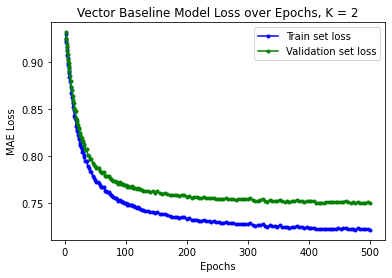

In [16]:
noreg_k2_epochs = ag_np.array(noreg_k2_model.trace_epoch)
noreg_k2_epochs_of_interest = ag_np.argwhere(noreg_k2_epochs >= 2.0)

noreg_k2_train_loss = ag_np.array(noreg_k2_model.trace_mae_train)[noreg_k2_epochs_of_interest]
noreg_k2_valid_loss = ag_np.array(noreg_k2_model.trace_mae_valid)[noreg_k2_epochs_of_interest]

plt.plot(noreg_k2_epochs[noreg_k2_epochs_of_interest], noreg_k2_train_loss, 'b.-', label='Train set loss')
plt.plot(noreg_k2_epochs[noreg_k2_epochs_of_interest], noreg_k2_valid_loss, 'g.-', label='Validation set loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')
plt.title('Vector Baseline Model Loss over Epochs, K = 2')

In [22]:
save_predictions(noreg_k2_model, 
                 'noreg_k2_model', 
                 noreg_k2_final_mu, 
                 noreg_k2_final_b_per_user, 
                 noreg_k2_final_c_per_item, 
                 noreg_k2_final_U, 
                 noreg_k2_final_V)
#MAE on Leaderboard = 0.7401

Text(0.5, 1.0, 'Vector Baseline Model Loss over Epochs, K = 50 with a = 1')

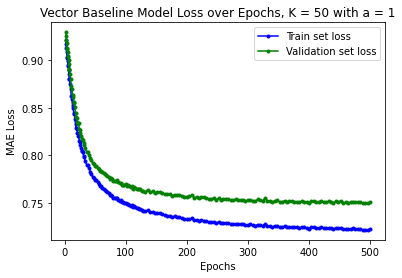

In [34]:
modreg_a1_k50_epochs             = ag_np.array(modreg_a1_k50_model.trace_epoch)
modreg_a1_k50_epochs_of_interest = ag_np.argwhere(modreg_a1_k50_epochs >= 2.0)

modreg_a1_k50_train_loss = ag_np.array(modreg_a1_k50_model.trace_mae_train)[modreg_a1_k50_epochs_of_interest]
modreg_a1_k50_valid_loss = ag_np.array(modreg_a1_k50_model.trace_mae_valid)[modreg_a1_k50_epochs_of_interest]

plt.plot(modreg_a1_k50_epochs[modreg_a1_k50_epochs_of_interest], modreg_a1_k50_train_loss, 'b.-', label='Train set loss')
plt.plot(modreg_a1_k50_epochs[modreg_a1_k50_epochs_of_interest], modreg_a1_k50_valid_loss, 'g.-', label='Validation set loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')
plt.title('Vector Baseline Model Loss over Epochs, K = 50 with a = 1')

In [ ]:
# Create the model and initialize its parameters
# to have right scale as the dataset (right num users and items)
modreg_a10_b100_k50_model = CollabFilterOneVectorPerItem(
    n_epochs=500, batch_size=100, step_size=0.1,
    n_factors=50, alpha=10)
modreg_a10_b100_k50_model.init_parameter_dict(n_users, n_items, train_tuple)

# Fit the model with SGD
modreg_a10_b100_k50_model.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total     1.32311 | train_MAE     1.00234 | valid_MAE     1.00798 | grad_wrt_mu     0.69999 | grad_wrt_b_per_user     0.00176 | grad_wrt_c_per_item     0.00101 | grad_wrt_U     0.00020 | grad_wrt_V     0.00018
epoch       0.001 | loss_total     1.39496 | train_MAE     0.99448 | valid_MAE     0.99948 | grad_wrt_mu     0.73955 | grad_wrt_b_per_user     0.00198 | grad_wrt_c_per_item     0.00111 | grad_wrt_U     0.00020 | grad_wrt_V     0.00018
epoch       0.003 | loss_total     1.49873 | train_MAE     0.98616 | valid_MAE     0.99052 | grad_wrt_mu     0.91104 | grad_wrt_b_per_user     0.00217 | grad_wrt_c_per_item     0.00122 | grad_wrt_U     0.00021 | grad_wrt_V     0.00019
epoch       0.004 | loss_total     1.37671 | train_MAE     0.97591 | valid_MAE     0.97947 | grad_wrt_mu     0.92832 | grad_wrt_b_per_user     0.00207 | grad_wrt_c_per_item     0.00114 | grad_wrt_U     0.00021 | grad_wrt_V     0.00018
epoch       0.126 | loss_total     1.46365 | train_MAE     0

epoch      12.000 | loss_total     0.88411 | train_MAE     0.74333 | valid_MAE     0.76314 | grad_wrt_mu     0.08698 | grad_wrt_b_per_user     0.00154 | grad_wrt_c_per_item     0.00089 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      13.000 | loss_total     0.87994 | train_MAE     0.74086 | valid_MAE     0.76109 | grad_wrt_mu     0.29298 | grad_wrt_b_per_user     0.00153 | grad_wrt_c_per_item     0.00088 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      14.000 | loss_total     0.87598 | train_MAE     0.73981 | valid_MAE     0.76078 | grad_wrt_mu     0.36558 | grad_wrt_b_per_user     0.00148 | grad_wrt_c_per_item     0.00083 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      15.000 | loss_total     0.87274 | train_MAE     0.73740 | valid_MAE     0.75860 | grad_wrt_mu     0.04972 | grad_wrt_b_per_user     0.00158 | grad_wrt_c_per_item     0.00086 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      16.000 | loss_total     0.86998 | train_MAE     0

epoch      62.000 | loss_total     0.83623 | train_MAE     0.72072 | valid_MAE     0.74967 | grad_wrt_mu     0.13277 | grad_wrt_b_per_user     0.00144 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      64.000 | loss_total     0.83593 | train_MAE     0.72183 | valid_MAE     0.75112 | grad_wrt_mu     0.48980 | grad_wrt_b_per_user     0.00140 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      66.000 | loss_total     0.83601 | train_MAE     0.72045 | valid_MAE     0.74955 | grad_wrt_mu     0.00810 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00072 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      68.000 | loss_total     0.83558 | train_MAE     0.71840 | valid_MAE     0.74684 | grad_wrt_mu     0.24783 | grad_wrt_b_per_user     0.00141 | grad_wrt_c_per_item     0.00081 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      70.000 | loss_total     0.83512 | train_MAE     0

epoch     136.000 | loss_total     0.83150 | train_MAE     0.72097 | valid_MAE     0.75228 | grad_wrt_mu     0.15838 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00077 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     140.000 | loss_total     0.83135 | train_MAE     0.71808 | valid_MAE     0.74887 | grad_wrt_mu     0.07758 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     144.000 | loss_total     0.83146 | train_MAE     0.71976 | valid_MAE     0.75111 | grad_wrt_mu     0.23601 | grad_wrt_b_per_user     0.00146 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     148.000 | loss_total     0.83153 | train_MAE     0.71738 | valid_MAE     0.74817 | grad_wrt_mu     0.35335 | grad_wrt_b_per_user     0.00155 | grad_wrt_c_per_item     0.00091 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     152.000 | loss_total     0.83138 | train_MAE     0

In [ ]:
print(f"Final Train MAE = {modreg_a10_b100_k50_model.trace_mae_train[-1]}")
print(f"Final Valid MAE = {modreg_a10_b100_k50_model.trace_mae_valid[-1]}")

modreg_a10_b100_k50_final_mu         = modreg_a10_b100_k50_model.param_dict['mu']
modreg_a10_b100_k50_final_b_per_user = modreg_a10_b100_k50_model.param_dict['b_per_user']
modreg_a10_b100_k50_final_c_per_item = modreg_a10_b100_k50_model.param_dict['c_per_item']
modreg_a10_b100_k50_final_U          = modreg_a10_b100_k50_model.param_dict['U']
modreg_a10_b100_k50_final_V          = modreg_a10_b100_k50_model.param_dict['V']

modreg_a10_b100_k50_test_yhat        = modreg_a10_b100_k50_model.predict(test_tuple[0], test_tuple[1], 
                                                        mu=modreg_a10_b100_k50_final_mu, 
                                                        b_per_user=modreg_a10_b100_k50_final_b_per_user, 
                                                        c_per_item=modreg_a10_b100_k50_final_c_per_item, 
                                                        U=modreg_a10_b100_k50_final_U, 
                                                        V=modreg_a10_b100_k50_final_V)
modreg_a1_k50_test_mae = ag_np.mean(ag_np.absolute(test_y - modreg_a10_b100_k50_test_yhat))
print(f"Final Test MAE = {modreg_a10_b100_k50_test_mae}")